# Shrinkage methods for Linear Regression

In this example, we will look at shrinkage methods for linear regression models, which help determine which features are the most important for the prediction.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import accuracy_score

Let us start by loading the dataset. For this example, we will use the Breast Cancer Wisconsin dataset - details can be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29. 

Remember to standardize the inputs before using Ridge Regression!

In [5]:
dataset = datasets.load_breast_cancer()
X = dataset.data
print(X.shape)
y = dataset.target
features = dataset.feature_names

# Standardize the inputs - zero mean and unit variance

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

(569, 30)


First, let's look at the coefficients returned during Linear Regression.

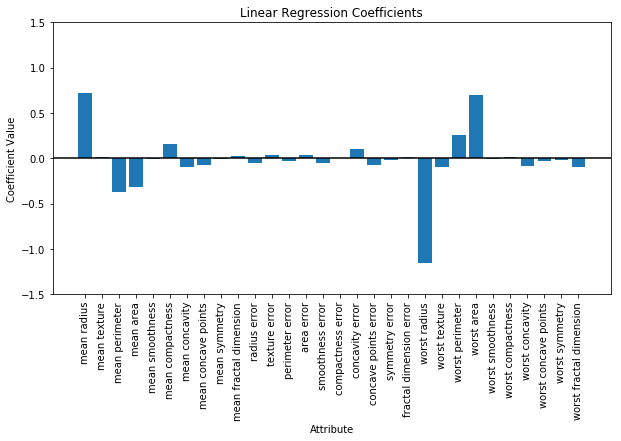

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)
beta = model.coef_

# Plot the coefficients
xaxis = np.arange(beta.shape[0])
plt.figure(figsize=(10,5))
plt.bar(xaxis, beta)
plt.title('Linear Regression Coefficients')
plt.xlabel('Attribute')
plt.ylabel('Coefficient Value')
plt.axhline(0, color='black')
plt.xticks(xaxis, features, rotation='vertical')
plt.ylim(-1.5,1.5)
plt.show()

Now let us fit this data using Ridge Regression, and observe the model parameters.

$\hat{\beta}_{ridge} = argmin\{ \sum_{i=1}^n(y_i - \beta_0 - \sum_{j=1}^px_{ij}\beta_j)^2 + \lambda \sum_{j=1}^p \beta_j^2 \}$

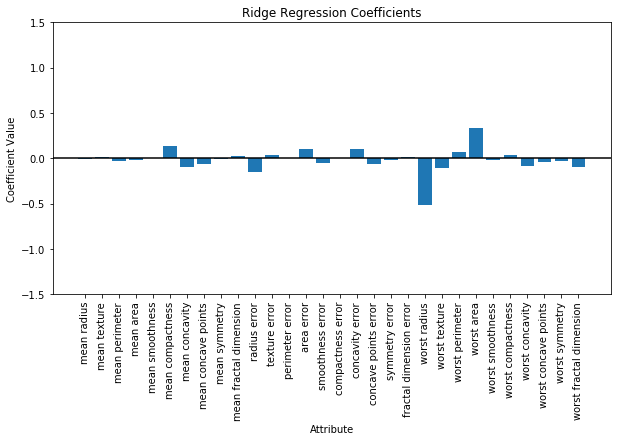

In [7]:
model = Ridge(alpha=0.5)
model.fit(X_train, y_train)
beta = model.coef_

# Plot the coefficients
xaxis = np.arange(beta.shape[0])
plt.figure(figsize=(10,5))
plt.bar(xaxis, beta)
plt.title('Ridge Regression Coefficients')
plt.xlabel('Attribute')
plt.ylabel('Coefficient Value')
plt.axhline(0, color='black')
plt.xticks(xaxis, features, rotation='vertical')
plt.ylim(-1.5,1.5)
plt.show()

We can see that several of the coefficients have shrunk to low values close to zero, and there are fewer attributes that dominate.

Now let us look at LASSO, a shrinkage method that enforces sparsity.

$\hat{\beta}_{lasso} = argmin\{ \sum_{i=1}^n(y_i - \beta_0 - \sum_{j=1}^px_{ij}\beta_j)^2 + \lambda \sum_{j=1}^p |\beta_j| \}$

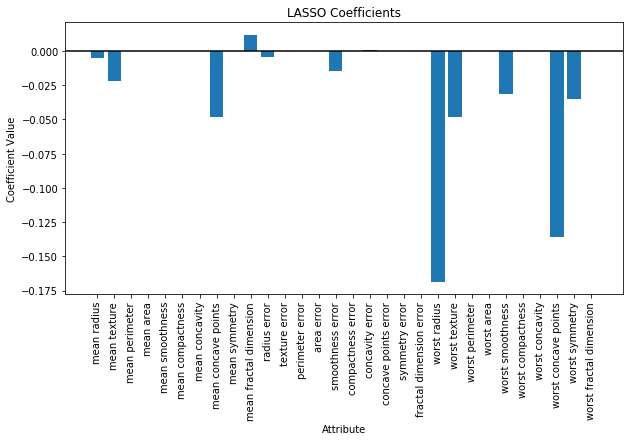

In [8]:
model = Lasso(alpha=0.01)
model.fit(X_train, y_train)
beta = model.coef_

# Plot the coefficients
xaxis = np.arange(beta.shape[0])
plt.figure(figsize=(10,5))
plt.bar(xaxis, beta)
plt.title('LASSO Coefficients')
plt.xlabel('Attribute')
plt.ylabel('Coefficient Value')
plt.axhline(0, color='black')
plt.xticks(xaxis, features, rotation='vertical')
plt.show()